TODO:
- Replicate table 3.4 from Chaoyun's paper
- Check Chaoyun's code

In [4]:
from __future__ import division

from utils import *
from create_data import *

import os
import pandas as pd
import numpy as np
from collections import OrderedDict
import time
from datetime import datetime
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
# from datetime import utcfromtimestamp

# import sqlite3

from ggplot import *
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

### R stuff

In [2]:
# If you want to ignore R warnings.
# import warnings
# warnings.filterwarnings('ignore')

# from rpy2.robjects.packages import isinstalled
# from rpy2.robjects.vectors import StrVector
# import rpy2.robjects.packages as rpackages
# from rpy2.robjects.packages import importr

# utils = rpackages.importr('utils')
# utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# packnames = ('forecast')
# utils.install_packages(packnames)

# isinstalled('forecast')

# %%R
# y <- 1

# %load_ext rpy2.ipython

### Define project vars

In [5]:
dir_proj = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis'
dir_data = os.path.join(dir_proj, 'data')
dir_run = os.path.join(dir_proj, 'run', str(date.today()))

In [6]:
HOUSE_IDS = range(1, 22); HOUSE_IDS.remove(14)  # no house 14
APP_NAMES = ['fridge', 'kettle', 'washing machine', 'dishwasher', 'microwave']
# tz = 'Europe/London'

In [7]:
# params_appliance = get_params_appliance()
dir_refit_csv = os.path.join(dir_data, 'CLEAN_REFIT_081116')
dir_refit = os.path.join(dir_data, 'refit')

In [7]:
# save_refit_data(dir_refit_csv=dir_refit_csv,
#                 dir_refit_np=dir_refit,
#                 nrows=None)

writing REFIT data...
added house 1 (0.31 min)
added house 2 (0.25 min)
added house 3 (0.32 min)
added house 4 (0.37 min)
added house 5 (0.37 min)
added house 6 (0.31 min)
added house 7 (0.32 min)
added house 8 (0.33 min)
added house 9 (0.24 min)
added house 10 (0.34 min)
added house 11 (0.32 min)
added house 12 (0.29 min)
added house 13 (0.26 min)
added house 15 (0.36 min)
added house 16 (0.27 min)
added house 17 (0.25 min)
added house 18 (0.24 min)
added house 19 (0.22 min)
added house 20 (0.19 min)
added house 21 (0.2 min)
done!


In [8]:
apps = pd.read_csv(os.path.join(dir_data, 'appliances.csv'))
app_dict = create_app_dict()
apps = apps_add_cols_from_patterns(apps, app_dict)

In [9]:
get_house_app_tuples, get_app_nums, get_app_name, is_a_target_app = create_app_funs(apps, app_dict, APP_NAMES)
load_app, load_ts, load_issues = create_load_funs(dir_refit)

# app_col, pattern = app_col_and_pattern_tuples[1]
# for i in apps.loc[apps[app_col] == 1]['ApplianceOrig'].values:
#     print i

# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('fridge')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('kettle')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('washi')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('dish')]
# apps.loc[apps['ApplianceOrig'].str.lower().str.contains('micro')]

# get_house_app_tuples('fridge')
# get_house_app_tuples('kettle')
# get_house_app_tuples('washing machine')

In [326]:
# Note change in fridge-freezer model.
# plot_app_change(4, datetime(2014,8,17), app_names='fridge-freezer')

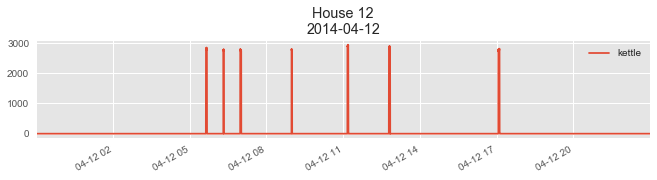

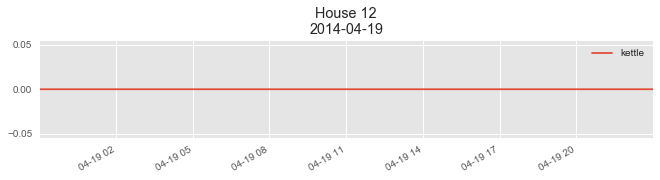

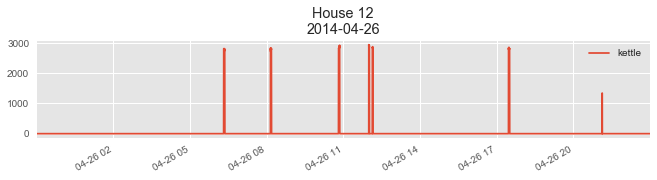

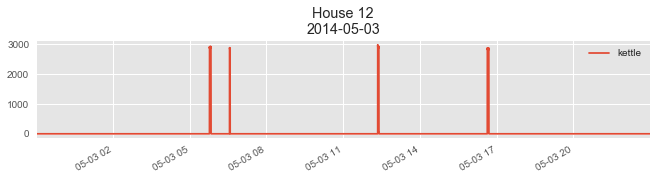

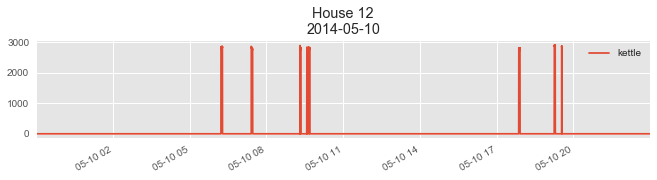

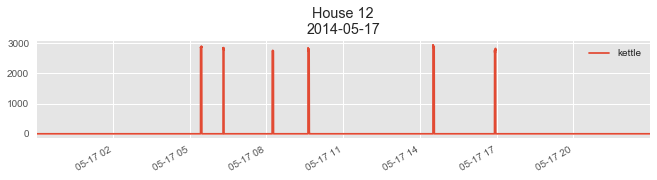

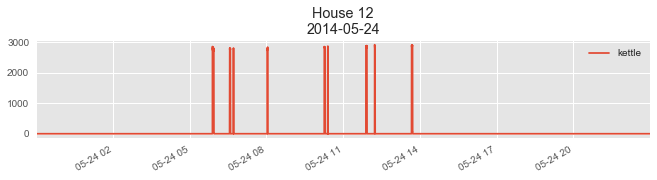

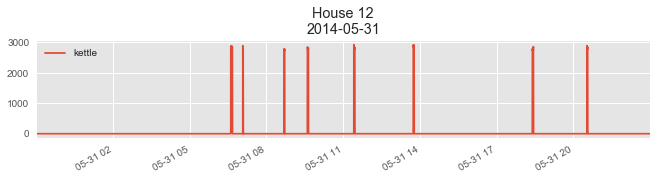

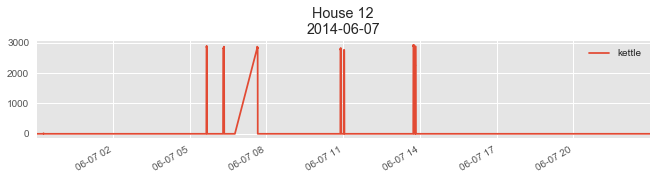

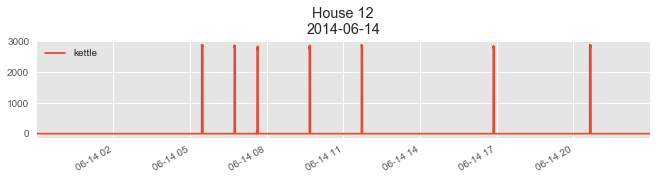

In [347]:
# Note how it appears to be a kettle and not a computer site.
# plot_app_change(12, datetime(2014,5,17), day_range=np.array(range(-5,5))*7, app_names='kettle')

In [ ]:
# create_daily_plots(house_ids, dir_run)

In [38]:
# dstats = create_daily_stats(HOUSE_IDS,
#                             pkl_path=os.path.join(dir_data, 'stats_by_day.pkl'),
#                             nrow=None)

In [10]:
dstats = pd.read_pickle(os.path.join(dir_data, 'stats_by_day.pkl'))

In [279]:
# plot_day(2, datetime.datetime(2014,9,7), figsize=(11,8))

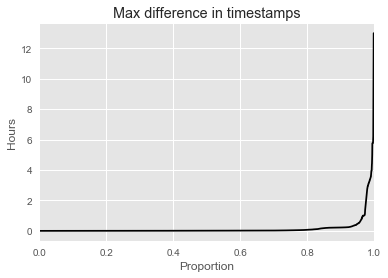

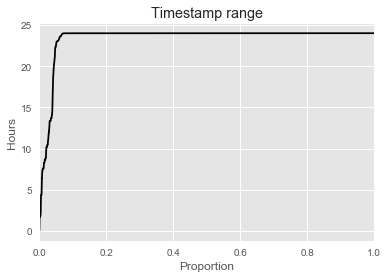

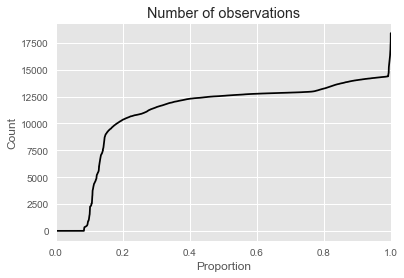

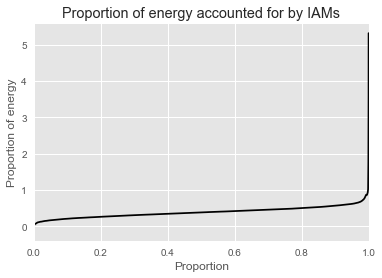

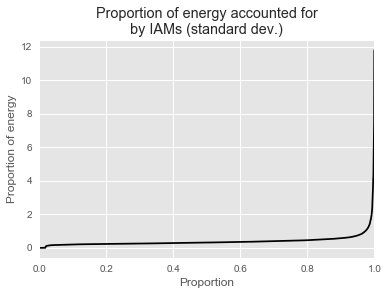

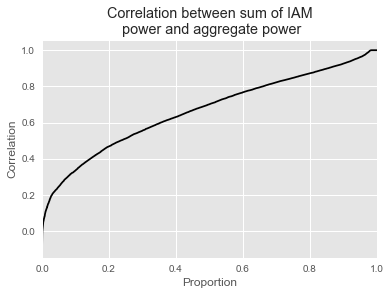

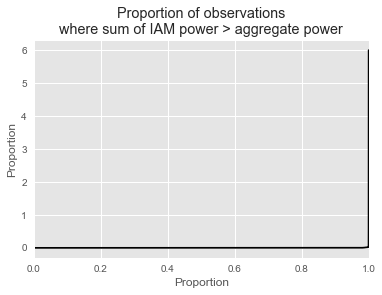

In [9]:
vars_to_plot = [{'col': ('UnixDiff', 'max'), 'ylab': 'Hours', 'title': 'Max difference in timestamps'},
                {'col': 'HourRange', 'ylab': 'Hours', 'title': 'Timestamp range'},
                {'col': ('RowNum', 'len'), 'ylab': 'Count', 'title': 'Number of observations'},
                {'col': ('PctAccountedEnergy', 'total'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for by IAMs'},
                {'col': ('PctAccountedEnergy', 'std'), 'ylab': 'Proportion of energy', 'title': 'Proportion of energy accounted for\nby IAMs (standard dev.)'},
                {'col': 'SumToMainCorr', 'ylab': 'Correlation', 'title': 'Correlation between sum of IAM\n power and aggregate power'},
                {'col': ('Issues', 'mean'), 'ylab': 'Proportion', 'title': 'Proportion of observations\nwhere sum of IAM power > aggregate power'}]
for var_to_plot in vars_to_plot:
    plot_data = pd.DataFrame({'X': sorted(dstats[var_to_plot['col']].dropna())})
    plot_data['Proportion'] = [i/plot_data.shape[0] for i in range(plot_data.shape[0])]
    ax = plot_data.set_index('Proportion').plot(color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_ylabel(var_to_plot['ylab'])
    ax.legend().set_visible(False)

In [ ]:
for var_to_plot in vars_to_plot:
    var_name = var_to_plot['col']
    kde_data = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).dropna().values
    ax = sns.distplot(kde_data, rug=False, color='black')
    ax.set_title(var_to_plot['title'])
    ax.set_xlabel(var_to_plot['ylab'])
    plt.show()

In [10]:
# Get NaN proportions.
for var_to_plot in vars_to_plot:
    x = dstats[var_to_plot['col']].replace([np.inf, -np.inf], np.nan).values
    print '{0}: {1:0.2g}'.format(var_to_plot['col'], np.mean(np.isnan(x)))

('UnixDiff', 'max'): 0.083
HourRange: 0.083
('RowNum', 'len'): 0
('PctAccountedEnergy', 'total'): 0.084
('PctAccountedEnergy', 'std'): 0.12
SumToMainCorr: 0.084
('Issues', 'mean'): 0.083


In [465]:
# %run create_data

def plot_samples(condition, n=10):
    sample = dstats.loc[condition].sample(n)
    dt_series = sample.index.to_datetime()
    house_ids = sample['House'].values
    for dt, house_id in zip(dt_series, house_ids):
        plot_day(dt=dt, house_id=house_id)
        plt.show()

np.random.seed(1)
# print 'UnixDiff'
# plot_samples(dstats[('UnixDiff', 'max')] > 0.25, 10)
# print 'HourRange'
# plot_samples(dstats['HourRange'] < 23.5, 10)
print 'RowNum'
plot_samples((np.isfinite(dstats[('RowNum', 'len')].values)) & (dstats[('RowNum', 'len')] < 2000), 10)
# print 'PctAccountedEnergy - identity'
# plot_samples(dstats[('PctAccountedEnergy', 'identity')] > float('inf'), 10)
# print 'PctAccountedEnergy - std'
# plot_samples(dstats[('PctAccountedEnergy', 'std')] > float('inf'), 10)
# print 'SumToMainCorr'
# plot_samples(dstats['SumToMainCorr'] < 0.20, 10)
# print 'Issues'
# plot_samples(dstats[('Issues', 'mean')] > 0.01, 10)

In [424]:
# house_id = 16
# dt = datetime(2014,10,11)
# df = get_df(house_id=house_id, dt_start=dt)

In [462]:
# dstats.to_csv(os.path.join(dir_data, 'dstats_TEMP.csv'))

In [215]:
dstats

RowNum                Time                      UnixDiff  \
              len                 min                 max       max   
Time                                                                  
2013-10-09   5164 2013-10-09 13:06:17 2013-10-09 23:59:59  1.211944   
2013-10-10  12878 2013-10-10 00:00:00 2013-10-10 23:59:46  0.212222   
2013-10-11  13651 2013-10-11 00:00:00 2013-10-11 23:59:46  0.014167   
2013-10-12  13890 2013-10-12 00:00:00 2013-10-12 23:59:58  0.220278   
2013-10-13  14302 2013-10-13 00:00:01 2013-10-13 23:59:59  0.004722   
2013-10-14  14177 2013-10-14 00:00:02 2013-10-14 23:59:58  0.180278   
2013-10-15  14072 2013-10-15 00:00:01 2013-10-15 23:59:59  0.228333   
2013-10-16  13972 2013-10-16 00:00:01 2013-10-16 23:59:59  0.209722   
2013-10-17  14159 2013-10-17 00:00:00 2013-10-17 23:59:46  0.231667   
2013-10-18  14029 2013-10-18 00:00:00 2013-10-18 23:59:59  0.216389   
2013-10-19  14201 2013-10-19 00:00:01 2013-10-19 23:59:59  0.206111   
2013-10-20  14188 2013-10-20 00:00:01 2013-10-20 23:59:59  0.005833   
2013-10-21  13705 2013-10-21 00:00:01 2013-10-21 23:59:58  0.285000   
2013-10-22  14075 2013-10-22 00:00:01 2013-10-22 23:59:59  0.222222   
2013-10-23  13731 2013-10-23 00:00:01 2013-10-23 23:59:59  0.216944   
2013-10-24  13854 2013-10-24 00:00:00 2013-10-24 23:59:58  0.215556   
2013-10-25  14023 2013-10-25 00:00:01 2013-10-25 23:59:59  0.213056   
2013-10-26  13741 2013-10-26 00:00:01 2013-10-26 22:59:58  0.006111   
2013-10-27  14540 2013-10-27 00:00:01 2013-10-27 23:59:59  0.207778   
2013-10-28  13771 2013-10-28 00:00:01 2013-10-28 23:59:59  0.285833   
2013-10-29  13931 2013-10-29 00:00:01 2013-10-29 23:59:59  0.221667   
2013-10-30  13599 2013-10-30 00:00:02 2013-10-30 23:59:59  0.225278   
2013-10-31  13723 2013-10-31 00:00:01 2013-10-31 23:59:59  0.228611   
2013-11-01  14078 2013-11-01 00:00:02 2013-11-01 23:59:59  0.228611   
2013-11-02  14241 2013-11-02 00:00:01 2013-11-02 23:59:58  0.112778   
2013-11-03  14008 2013-11-03 00:00:01 2013-11-03 23:59:59  0.008889   
2013-11-04  14046 2013-11-04 00:00:01 2013-11-04 23:59:59  0.082222   
2013-11-05  13325 2013-11-05 00:00:01 2013-11-05 23:59:59  0.217500   
2013-11-06  10574 2013-11-06 00:00:01 2013-11-06 23:59:49  0.215278   
2013-11-07   3972 2013-11-07 00:00:04 2013-11-07 10:03:19  0.007222   
...           ...                 ...                 ...       ...   
2015-06-11      0                 NaT                 NaT       NaN   
2015-06-12      0                 NaT                 NaT       NaN   
2015-06-13      0                 NaT                 NaT       NaN   
2015-06-14      0                 NaT                 NaT       NaN   
2015-06-15      0                 NaT                 NaT       NaN   
2015-06-16      0                 NaT                 NaT       NaN   
2015-06-17      0                 NaT                 NaT       NaN   
2015-06-18  11986 2015-06-18 01:39:44 2015-06-18 23:59:58  0.003333   
2015-06-19  12897 2015-06-19 00:00:05 2015-06-19 23:59:55  0.002500   
2015-06-20  12856 2015-06-20 00:00:02 2015-06-20 23:59:57  0.041944   
2015-06-21  12820 2015-06-21 00:00:04 2015-06-21 23:59:59  0.002222   
2015-06-22  12874 2015-06-22 00:00:06 2015-06-22 23:59:58  0.079167   
2015-06-23   4673 2015-06-23 00:00:05 2015-06-23 08:50:14  0.036389   
2015-06-24   6188 2015-06-24 12:23:39 2015-06-24 23:59:59  0.067222   
2015-06-25  12864 2015-06-25 00:00:05 2015-06-25 23:59:59  0.003056   
2015-06-26  12876 2015-06-26 00:00:06 2015-06-26 23:59:53  0.002222   
2015-06-27  12882 2015-06-27 00:00:00 2015-06-27 23:59:56  0.009167   
2015-06-28  12682 2015-06-28 00:00:03 2015-06-28 23:59:55  0.203889   
2015-06-29  12902 2015-06-29 00:00:02 2015-06-29 23:59:54  0.002500   
2015-06-30  12855 2015-06-30 00:00:01 2015-06-30 23:59:55  0.048333   
2015-07-01  12503 2015-07-01 00:00:02 2015-07-01 23:59:55  0.004722   
2015-07-02  11948 2015-07-02 00:00:01 2015-07-02 23:59:54  1.750833   
2015-07-03  12831 2015-07-03 00:00:

In [11]:
dstats = clean_daily_stats(dstats)

cleaning daily stats...
1013 (9.3%) rows affected in total, 1013 (9.3%) new | Condition 1 (('RowNum', 'len'))
750 (6.9%) rows affected in total, 650 (6%) new | Condition 2 (('UnixDiff', 'max'))
605 (5.6%) rows affected in total, 422 (3.9%) new | Condition 3 (HourRange)
6 (0.055%) rows affected in total, 0 (0%) new | Condition 4 (('Issues', 'mean'))
64 (0.59%) rows affected in total, 21 (0.19%) new | Condition 5 (HoursInDay)
1 (0.0092%) rows affected in total, 1 (0.0092%) new | Condition 6 (('Appliance0', 'mean'))
0 (0%) rows affected in total, 0 (0%) new | Condition 7 (('Appliance0', 'median'))
9 (0.083%) rows affected in total, 7 (0.064%) new | Condition 8 (('Appliance0', 'min'))
1 (0.0092%) rows affected in total, 0 (0%) new | Condition 9 (('EnergyAppliance0', 'sum'))
0 (0%) rows affected in total, 0 (0%) new | Condition 10 (('Appliance1', 'mean'))
0 (0%) rows affected in total, 0 (0%) new | Condition 11 (('Appliance1', 'median'))
0 (0%) rows affected in total, 0 (0%) new | Condition

In [12]:
# get_energy(dstats, 1, datetime(2014,4,5), [1])

In [19]:
# %run create_data

get_app_nums(4, 'fridge')
# get_energy(dstats, 4, datetime.datetime(2013,10,12), [1, 3])

[1, 3]

In [484]:
# get_house_app_tuples('washing machine', True)

In [502]:
# agg.loc[agg['House']==house_id].loc[str(dt.date())]['Delete'].values[0]

In [36]:
# X, Y, x_house, x_date = create_data(HOUSE_IDS, app_names, dstats, dir_data)

/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/sipola/miniconda2/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


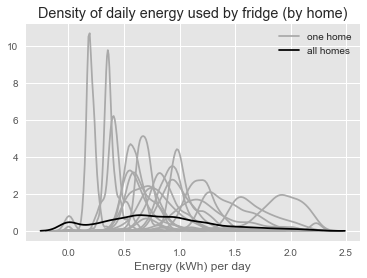

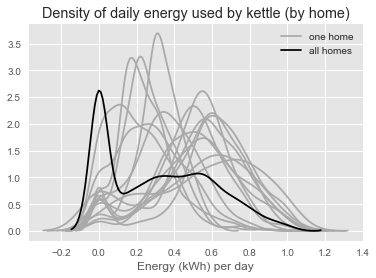

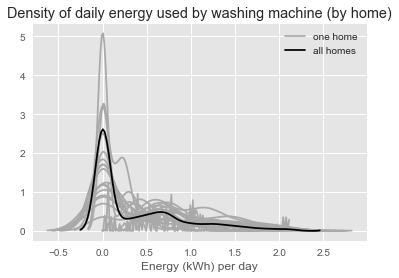

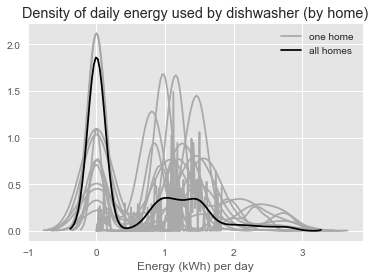

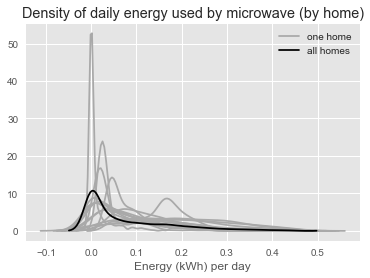

In [14]:
X = np.load(os.path.join(dir_data, 'for_model', 'real', 'X.npy'))
Y = np.load(os.path.join(dir_data, 'for_model', 'real', 'Y.npy'))
x_house = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_house.npy'))
x_date = np.load(os.path.join(dir_data, 'for_model', 'real', 'x_date.npy'))

house_ids_plot = list(set(x_house))
for i, app_name in enumerate(APP_NAMES):
    y = pd.DataFrame({'Energy': [y_row[i] for y_row in Y],
                      'House': x_house})
    y = y[y['Energy'] < np.percentile(y['Energy'], 98)]
    for house_id_plot in house_ids_plot:
        label = 'one home' if house_id_plot == house_ids_plot[0] else None
        y_house = y.loc[y['House'] == house_id_plot]
        # ax = sns.kdeplot(y_house['Energy'].values, label='House {}'.format(house_id_plot))
        ax = sns.kdeplot(y_house['Energy'].values, color='darkgray', label=label)
        ax.set_title('Density of daily energy used by {} (by home)'.format(app_name))
        ax.set_xlabel('Energy (kWh) per day')
        # ax.set_xlim(0,)
    ax = sns.kdeplot(y['Energy'].values, color='black', label='all homes')
    plt.show()

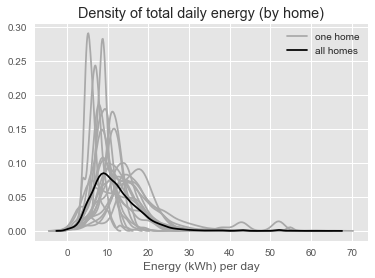

In [15]:
y = pd.DataFrame({'Energy': dstats[('EnergyAppliance0', 'sum')],
                  'House': dstats['House']})
# y = y[y['Energy'] < np.percentile(y['Energy'], 95)]
# print y
not_too_big   = y['Energy'] < np.percentile(y['Energy'].dropna(), 99.99)
not_too_small = y['Energy'] > np.percentile(y['Energy'].dropna(), 0.01)
y = y[(not_too_big) & (not_too_small)]
for house_id in HOUSE_IDS:
    label = 'one home' if house_id == HOUSE_IDS[0] else None
    y_house = y.loc[y['House'] == house_id]
    ax = sns.kdeplot(y_house['Energy'].values, color='darkgray', label=label)
    ax.set_title('Density of total daily energy (by home)')
    ax.set_xlabel('Energy (kWh) per day')
ax = sns.kdeplot(y['Energy'].values, color='black', label='all homes')
plt.show()

In [40]:
# # One day with negative aggregate.
# plot_day(3, datetime(2014,4,6))

In [287]:
dstats.loc[dstats['House']==1]

RowNum                Time                      UnixDiff  \
              len                 min                 max       max   
Time                                                                  
2013-10-09   5164 2013-10-09 13:06:17 2013-10-09 23:59:59  1.211944   
2013-10-10  12878 2013-10-10 00:00:00 2013-10-10 23:59:46  0.212222   
2013-10-11  13651 2013-10-11 00:00:00 2013-10-11 23:59:46  0.014167   
2013-10-12  13890 2013-10-12 00:00:00 2013-10-12 23:59:58  0.220278   
2013-10-13  14302 2013-10-13 00:00:01 2013-10-13 23:59:59  0.004722   
2013-10-14  14177 2013-10-14 00:00:02 2013-10-14 23:59:58  0.180278   
2013-10-15  14072 2013-10-15 00:00:01 2013-10-15 23:59:59  0.228333   
2013-10-16  13972 2013-10-16 00:00:01 2013-10-16 23:59:59  0.209722   
2013-10-17  14159 2013-10-17 00:00:00 2013-10-17 23:59:46  0.231667   
2013-10-18  14029 2013-10-18 00:00:00 2013-10-18 23:59:59  0.216389   
2013-10-19  14201 2013-10-19 00:00:01 2013-10-19 23:59:59  0.206111   
2013-10-20  14188 2013-10-20 00:00:01 2013-10-20 23:59:59  0.005833   
2013-10-21  13705 2013-10-21 00:00:01 2013-10-21 23:59:58  0.285000   
2013-10-22  14075 2013-10-22 00:00:01 2013-10-22 23:59:59  0.222222   
2013-10-23  13731 2013-10-23 00:00:01 2013-10-23 23:59:59  0.216944   
2013-10-24  13854 2013-10-24 00:00:00 2013-10-24 23:59:58  0.215556   
2013-10-25  14023 2013-10-25 00:00:01 2013-10-25 23:59:59  0.213056   
2013-10-26  13741 2013-10-26 00:00:01 2013-10-26 22:59:58  0.006111   
2013-10-27  14540 2013-10-27 00:00:01 2013-10-27 23:59:59  0.207778   
2013-10-28  13771 2013-10-28 00:00:01 2013-10-28 23:59:59  0.285833   
2013-10-29  13931 2013-10-29 00:00:01 2013-10-29 23:59:59  0.221667   
2013-10-30  13599 2013-10-30 00:00:02 2013-10-30 23:59:59  0.225278   
2013-10-31  13723 2013-10-31 00:00:01 2013-10-31 23:59:59  0.228611   
2013-11-01  14078 2013-11-01 00:00:02 2013-11-01 23:59:59  0.228611   
2013-11-02  14241 2013-11-02 00:00:01 2013-11-02 23:59:58  0.112778   
2013-11-03  14008 2013-11-03 00:00:01 2013-11-03 23:59:59  0.008889   
2013-11-04  14046 2013-11-04 00:00:01 2013-11-04 23:59:59  0.082222   
2013-11-05  13325 2013-11-05 00:00:01 2013-11-05 23:59:59  0.217500   
2013-11-06  10574 2013-11-06 00:00:01 2013-11-06 23:59:49  0.215278   
2013-11-07   3972 2013-11-07 00:00:04 2013-11-07 10:03:19  0.007222   
...           ...                 ...                 ...       ...   
2015-06-11      0                 NaT                 NaT       NaN   
2015-06-12      0                 NaT                 NaT       NaN   
2015-06-13      0                 NaT                 NaT       NaN   
2015-06-14      0                 NaT                 NaT       NaN   
2015-06-15      0                 NaT                 NaT       NaN   
2015-06-16      0                 NaT                 NaT       NaN   
2015-06-17      0                 NaT                 NaT       NaN   
2015-06-18  12038 2015-06-18 01:39:44 2015-06-18 23:59:57  0.003333   
2015-06-19  12820 2015-06-19 00:00:04 2015-06-19 23:59:57  0.216667   
2015-06-20  12975 2015-06-20 00:00:04 2015-06-20 23:59:58  0.002222   
2015-06-21  12812 2015-06-21 00:00:04 2015-06-21 23:59:53  0.037500   
2015-06-22  12881 2015-06-22 00:00:00 2015-06-22 23:59:56  0.002222   
2015-06-23  12767 2015-06-23 00:00:02 2015-06-23 23:59:57  0.036389   
2015-06-24  12837 2015-06-24 00:00:03 2015-06-24 23:59:53  0.050278   
2015-06-25  12907 2015-06-25 00:00:00 2015-06-25 23:59:56  0.007778   
2015-06-26  12802 2015-06-26 00:00:03 2015-06-26 23:59:59  0.241944   
2015-06-27  12943 2015-06-27 00:00:06 2015-06-27 23:59:56  0.002222   
2015-06-28  12849 2015-06-28 00:00:02 2015-06-28 23:59:59  0.005833   
2015-06-29  12923 2015-06-29 00:00:05 2015-06-29 23:59:53  0.003611   
2015-06-30  12886 2015-06-30 00:00:00 2015-06-30 23:59:56  0.048611   
2015-07-01  11867 2015-07-01 00:00:03 2015-07-01 23:59:55  0.248889   
2015-07-02  12453 2015-07-02 00:00:02 2015-07-02 23:59:55  0.256389   
2015-07-03  12855 2015-07-03 00:00:

In [23]:
apps.loc[apps['House']==1]

,House,ApplianceNum,ApplianceOrig_Raw,ApplianceOrig_Cleaned,Appliance,Discrepancy,Discrepancy_Important,GuessOfCorrect,Fridge,Kettle,WashingMachine,DishWasher,Microwave
0,1,0,Aggregate,Aggregate,aggregate,0,0,NaN,0,0,0,0,0
1,1,1,Fridge,Fridge,fridge,0,0,NaN,1,0,0,0,0
2,1,2,Chest Freezer,Freezer(1),chest freezer,1,0,NaN,0,0,0,0,0
3,1,3,Upright Freezer,Freezer(2),upright freezer,1,0,NaN,0,0,0,0,0
4,1,4,Tumble Dryer,Washer Dryer,tumble dryer,1,1,raw?,0,0,0,0,0
5,1,5,Washing Machine,Washing Machine,washing machine,0,0,NaN,0,0,1,0,0
6,1,6,Dishwasher,Dishwasher,dishwasher,0,0,NaN,0,0,0,1,0
7,1,7,Computer Site,Computer,computer site,1,0,NaN,0,0,0,0,0
8,1,8,Television Site,Television Site,television site,0,0,NaN,0,0,0,0,0
9,1,9,Electric Heater,Electric Heater,electric heater,0,0,NaN,0,0,0,0,0


5


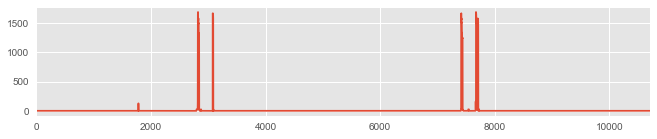

In [89]:
house_id = 8
app_name = 'microwave'
dt_start = datetime(2014,9,25)

params = make_app_params_dict()[app_name]
app_num = get_app_nums(house_id, app_name)[0]

ts_series = load_ts(house_id)
aligned_arrays, ts_mask = get_aligned_ts_mask_for_day(ts_series, dt_start, 6)

app_power = load_app(house_id, app_num)[ts_mask]
print get_num_activations(app_power,
                          ts_series[ts_mask],
                          params)

plot_series(app_power, figsize=(11,2))

In [153]:
# Plot num activations vs energy.
dir_real_old = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/data/for_model/real'
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-28/real'
dat_old = np.load(os.path.join(dir_real_old, 'Y.npy'))
# dat_old = np.load(os.path.join(dir_real_new, 'Y1.npy'))
dat_new = np.load(os.path.join(dir_real_new, 'Y1.npy'))

dat_new

array([[ 0.41592917,  0.        ,  0.        ,  0.88252639,  0.        ],
       [ 0.31927667,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.31819111,  0.        ,  0.        ,  0.        ,  0.        ],
       ..., 
       [ 2.23197417,  0.        ,  0.        ,  1.46398306,  0.        ],
       [ 2.23187083,  0.        ,  0.        ,  1.46391528,  0.        ],
       [ 2.23194833,  0.        ,  0.        ,  1.46396611,  0.        ]])

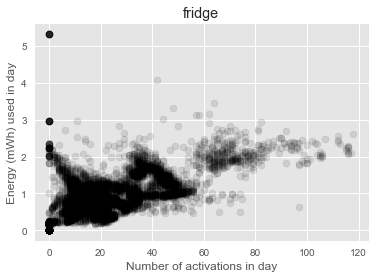

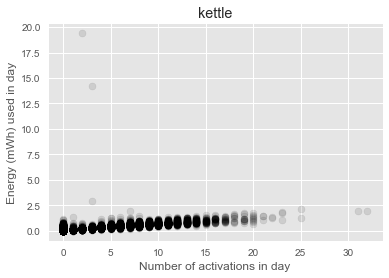

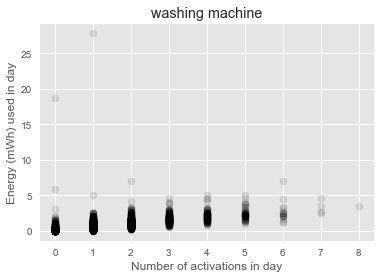

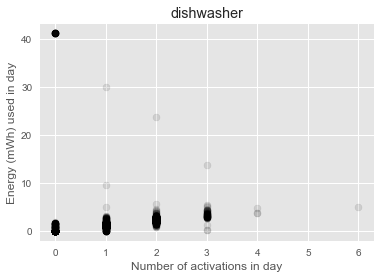

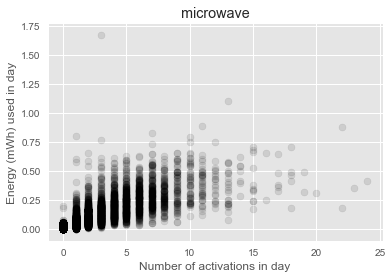

In [160]:
dir_real_new = '/Users/sipola/Google Drive/education/coursework/graduate/edinburgh/dissertation/thesis/run/2017-06-28/real'

X = np.load(os.path.join(dir_real_new, 'X.npy'))
Y1 = np.load(os.path.join(dir_real_new, 'Y1.npy'))
Y2 = np.load(os.path.join(dir_real_new, 'Y2.npy'))
x_house = np.load(os.path.join(dir_real_new, 'x_house.npy'))
x_date = np.load(os.path.join(dir_real_new, 'x_date.npy'))

for idx, app_name in enumerate(APP_NAMES):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(Y2[:,idx], Y1[:,idx], alpha=0.1, color='black')
    ax.set_title(app_name)
    ax.set_ylabel('Energy (mWh) used in day')
    ax.set_xlabel('Number of activations in day')
    # plt.hexbin(dat_old[:,idx], dat_new[:,idx], bins='log')
    plt.show()

17


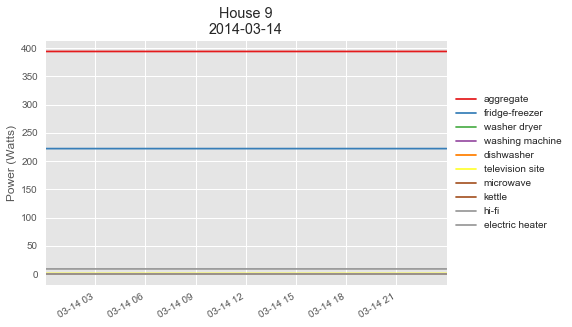

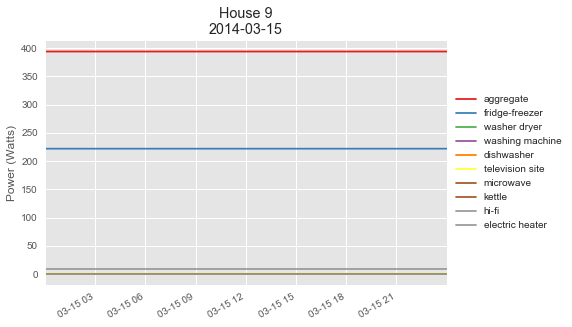

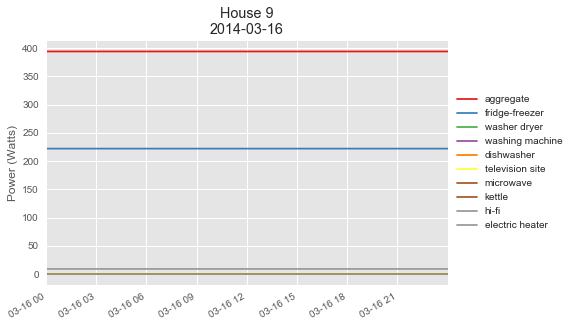

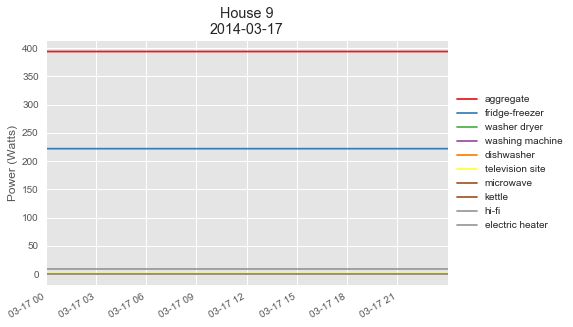

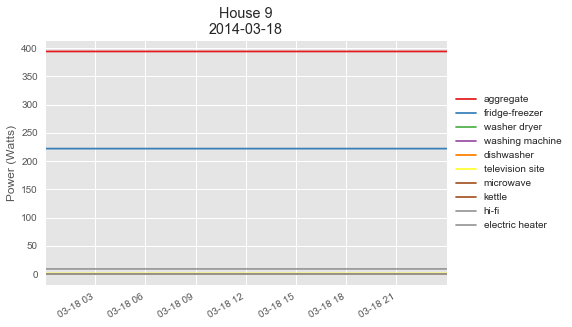

In [197]:
# For bad fridge values.
app_idx = 0
bad_idx = np.where((Y1[:,app_idx] > 5) & (Y2[:,app_idx] < 1))[0]

# # For bad dishwasher values.
# app_idx = 3
# bad_idx = np.where((Y1[:,app_idx] > 30) & (Y2[:,app_idx] < 1))[0]

# # For bad kettle values.
# app_idx = 1
# bad_idx = np.where((Y1[:,app_idx] > 2.5) & (Y2[:,app_idx] < 5))[0]

# # For bad washing machine values.
# app_idx = 2
# bad_idx = np.where((Y1[:,app_idx] > 5) & (Y2[:,app_idx] < 3))[0]

print len(bad_idx)

for idx in bad_idx[:5]:
    house_id = x_house[idx]
    d = x_date[idx]
    plot_day(house_id, date_to_datetime(d))

In [218]:
house_id = 13
dt = datetime(2014,4,7)
_, ts_mask = get_aligned_ts_mask_for_day(load_ts(13), dt, 6)
np.mean(load_issues(13)[ts_mask])

0.24904153354632588

delete: [0]
issues mean: 0.249041533546
issues sum: 3118


RowNum                Time                      UnixDiff  \
              len                 min                 max       max   
Time                                                                  
2014-04-07  12602 2014-04-07 00:00:03 2014-04-07 23:59:54  0.122778   

           EnergySumOfParts PctAccountedEnergy Issues            Appliance0  \
                        sum                std    sum      mean        mean   
Time                                                                          
2014-04-07        15.822181           4.847926    5.0  0.000397  377.969211   

                   ...   Appliance9              EnergyAppliance9  \
           median  ...       median  min     max              sum   
Time               ...                                              
2014-04-07  252.0  ...          0.0  0.0  2659.0        14.247415   

           SumToMainCorr PctAccountedEnergy HourRange HoursInDay House Delete  
                                      total                                    
Time                                                                           
2014-04-07      0.154922            1.76734   23.9975         24    13      0  

[1 rows x 64 columns]

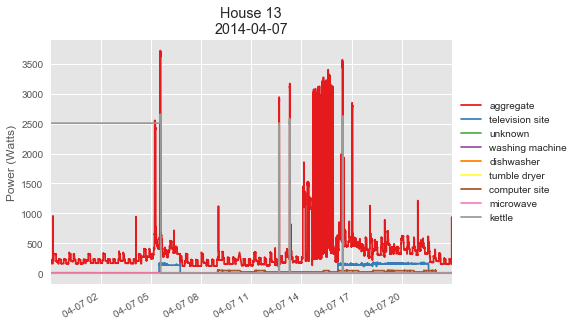

In [221]:
# FIX THIS!!!!
house_id = 13
dt = datetime(2014,4,7)

plot_day(house_id, date_to_datetime(dt))
dstats_row = dstats.loc[(dstats['House']==house_id) & (dstats.index==dt)]
print 'delete: {}'.format(dstats_row['Delete'].values)
print 'issues mean: {}'.format(np.mean(load_issues(13)[ts_mask]))
print 'issues sum: {}'.format(sum(load_issues(13)[ts_mask]))
dstats_row

In [227]:
# get_df(house_id, dt_start=dt, include_issues=True)['Issues']

3118

In [ ]:
dstats.loc[(dstats['House']==house_id) & (dstats.index==dt)]plot_day(10, date_to_datetime(datetime(2014,3,5)))

In [427]:
house_id = 10
dt = datetime(2015,5,29)
app_num = 4

print get_app_name(house_id=house_id, app_num=app_num)
print get_energy(house_id=house_id, d=dt.date(), dstats=dstats, app_nums=[app_num])
get_df(house_id=house_id,dt_start=dt)['Appliance{}'.format(app_num)].values[:5]

fridge-freezer
0.498523333333


array([1, 1, 1, 1, 1], dtype=int16)

In [16]:
plot_day(house_id, dt)
plt.show()

NameError: name 'dt' is not defined

In [ ]:
plt.close()
for x, house_id, d in zip(X, x_house, x_date):
    plot_pd_series(x)
    plot_day(house_id=house_id, dt=date_to_datetime(d))
    plt.show()

In [43]:
tmp = dstats.loc[dstats['Delete']==0]
tmp.loc[tmp.index >= datetime(2015,2,28)].shape[0] / tmp.shape[0]

0.18799682034976153

In [1]:
plot_day(5, datetime(2014,7,1))

NameError: name 'plot_day' is not defined

In [128]:
HOUSE_IDS_TEST = [2,9,20]
HOUSE_IDS_TRAIN_VAL = [house_id for house_id in HOUSE_IDS if house_id not in HOUSE_IDS_TEST]
TRAIN_VAL_DATE_MAX = datetime(2016,2,28)

def get_all_dts_for_house(house_id, train_days=None):
    
    ts_series = load_ts(house_id)
    dt_min = floor_time(ts2dt(int(ts_series.min())))
    dt_max = floor_time(ts2dt(int(ts_series.max())))

    # Account for weird issue where max date in numpy array is less than max date in
    # aggregate stats dataframe. Notably, for house 8, datetime(2015,5,11)
    # exists in the array but not in the dataframe.
    dt_min_dstats = dstats.loc[dstats['House']==house_id].index.min()
    dt_max_dstats = dstats.loc[dstats['House']==house_id].index.max()
    if dt_min != dt_min_dstats or dt_max != dt_max_dstats:
        print 'warning: fixing wrong min date ({} vs {}) or max date ({} vs {})'.format(
            dt_min.date(),
            dt_min_dstats.date(),
            dt_max.date(),
            dt_max_dstats.date())
        dt_min = max(dt_min, dt_min_dstats)
        dt_max = min(dt_max, dt_max_dstats)
    
    all_dts = [dt_min + timedelta(days=d) for d in range(0, (dt_max-dt_min).days+1)]
    if train_days is not None:
        train_days_dt = [dt64_to_datetime(dt) for dt in train_days]
        all_dts = [dt for dt in all_dts if dt in train_days_dt]  # only in given range
        
    return all_dts
        
train_days = get_train_days(dstats)

[datetime.datetime(2013, 12, 17, 0, 0), datetime.datetime(2013, 12, 19, 0, 0), datetime.datetime(2013, 12, 20, 0, 0), datetime.datetime(2013, 12, 21, 0, 0), datetime.datetime(2013, 12, 22, 0, 0)]


In [236]:
def calc_stats_for_house(house_id, nrow=None):
    '''
    Calculate daily summary stats for each home, to be used in other parts of project,
    e.g., determining which house/date combinations are good/clean enough for the model.
    '''
    
    WATTSEC_2_KWH = 1/3.6e6  # multiply by this to convert from Watt-sec to kWh


    num_unique = lambda x: len(set(x))

    # Define functions to be used in aggregation.
    funs = OrderedDict([
        ('RowNum', len),
        ('Time', [min, max]),
        ('UnixDiff', max),
        ('EnergySumOfParts', sum),
        # ('CorrCoef', lambda x: x.max()),
        ('PctAccountedEnergy', np.std),
        ('Issues', [sum, np.mean])
    ])
    for app_num in range(10):
        # Calculate total energy used by appliance.
        funs['Appliance{}'.format(app_num)] = [np.mean, np.median, min, max, num_unique]
        funs['EnergyAppliance{}'.format(app_num)] = sum
    
    # Import timestamp data, calculate diffs (for calculating energy used by appliances), and set index (for grouping by day)
    ts_series = load_ts(house_id)
    df = pd.DataFrame({'Unix': ts_series})  # will convert to Time later
    if nrow is not None:
        df = df.iloc[range(nrow)]
    df['UnixDiff'] = df['Unix']  # will take diff later in grouping
    df['Time'] = pd.to_datetime(df['Unix'], unit='s', utc=True)
    del df['Unix']
    df.set_index('Time', inplace=True)
    # df = df.tz_localize('GMT').tz_convert(tz)
    df = df.groupby(pd.TimeGrouper(freq='D')).transform(lambda x: calc_diff(x, True, 6))
    df['Time'] = df.index  # need this twice: one for grouping and one for calculating stats
    df['Issues'] = load_issues(house_id)  # need to do this after diff so they don't get zeroed out (was a bug!)
    df['RowNum'] = range(df.shape[0])  # need to do after diff (though doesn't really matter if taking len())
    
    # Calculate energy used by appliances.
    df['EnergySumOfParts'] = np.zeros(df.shape[0], dtype=np.int)
    for app_num in range(10):
        app_data = load_app(house_id, app_num)
        if nrow is not None:
            app_data = app_data[range(nrow)]
        df['Appliance{}'.format(app_num)] = app_data
        df['EnergyAppliance{}'.format(app_num)] = df['Appliance{}'.format(app_num)] * df['UnixDiff'] * WATTSEC_2_KWH
        if app_num > 0:
            df['EnergySumOfParts'] += df['EnergyAppliance{}'.format(app_num)]
    df['PctAccountedEnergy'] = df['EnergySumOfParts'] / df['EnergyAppliance0']
    
    # Calculation correlation between sum of appliances and main.
    corr = df[['EnergySumOfParts', 'EnergyAppliance0']].groupby(pd.TimeGrouper(freq='D')).corr().ix[0::2,'EnergyAppliance0']
    corr = corr.reset_index().drop('level_1', axis=1)
    corr.set_index('Time', inplace=True)
    
    # Aggregate by day and apply functions.
    dstats = df.groupby(pd.TimeGrouper(freq='D')).aggregate(funs)
    assert corr.shape[0] == dstats.shape[0]
    dstats['SumToMainCorr'] = corr['EnergyAppliance0']
    
    # Calculate percent of aggregate energy accounted for by appliances.
    dstats[('PctAccountedEnergy', 'total')] = dstats[('EnergySumOfParts', 'sum')] / dstats[('EnergyAppliance0', 'sum')]
    
    # Get timestamp range in hours.
    dstats['HourRange'] = dstats[('Time', 'max')] - dstats[('Time', 'min')]
    dstats['HourRange'] = dstats['HourRange'] / np.timedelta64(1, 'h')
    
    # Make TimestampDiff in hours.
    dstats[('UnixDiff', 'max')] = dstats[('UnixDiff', 'max')]/60/60

    # Calculate number of hours in day (!= 24, e.g., for daylight savings switchover days).
    dstats['HoursInDay'] = [hours_in_day(dt) for dt in dstats.index]

    return dstats

# dstats2 = calc_stats_for_house(13)
# dstats2
dstats2.loc[dstats2.index==datetime(2014,4,7)]





                       UnixDiff
Time                           
2014-01-17 22:26:20  1389997580
2014-01-17 22:27:19  1389997639
2014-01-17 22:27:34  1389997654
2014-01-17 22:27:49  1389997669
2014-01-17 22:28:04  1389997684
                     UnixDiff
Time                         
2014-01-17 22:26:20        59
2014-01-17 22:27:19        15
2014-01-17 22:27:34        15
2014-01-17 22:27:49        15
2014-01-17 22:28:04        15


RowNum                Time                      UnixDiff  \
              len                 min                 max       max   
Time                                                                  
2014-04-07  12602 2014-04-07 00:00:03 2014-04-07 23:59:54  0.122778   

           EnergySumOfParts PctAccountedEnergy  Issues            Appliance0  \
                        sum                std     sum      mean        mean   
Time                                                                           
2014-04-07        15.822181           4.847926  2639.0  0.209411  377.969211   

                     ...      Appliance9                               \
           median    ...            mean median  min     max <lambda>   
Time                 ...                                                
2014-04-07  252.0    ...      539.944533    0.0  0.0  2659.0       25   

           EnergyAppliance9 SumToMainCorr PctAccountedEnergy HourRange  \
                        sum                            total             
Time                                                                     
2014-04-07        14.247415      0.154922            1.76734   23.9975   

           HoursInDay  
                       
Time                   
2014-04-07         24  

[1 rows x 72 columns]